___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

In [2]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df2=df.copy()

In [4]:
df.pop("Unnamed: 0")

0            0
1            1
2            2
3            3
4            4
         ...  
23481    23481
23482    23482
23483    23483
23484    23484
23485    23485
Name: Unnamed: 0, Length: 23486, dtype: int64

In [5]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [7]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [8]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
df.duplicated().sum()

21

In [10]:
df["Division Name"].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: Division Name, dtype: int64

In [11]:
df["Department Name"].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [12]:
df["Rating"].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

In [13]:
df["Class Name"].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

In [14]:
df.groupby("Class Name")["Rating"].value_counts()

Class Name  Rating
Blouses     5         1686
            4          669
            3          394
            2          229
            1          119
                      ... 
Trend       5           52
            4           26
            3           19
            1           11
            2           11
Name: Rating, Length: 93, dtype: int64

### Data Wrangling

In [15]:
df["Recommended IND"] = df["Recommended IND"].map({1:0, 0:1})

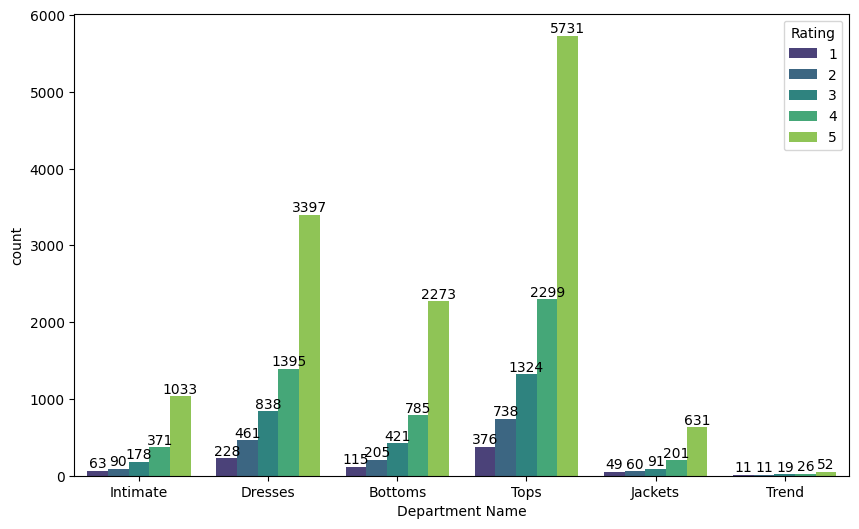

In [16]:
ax = sns.countplot(data = df, x ="Department Name", hue = "Rating",palette="viridis")
for p in ax.containers:
    ax.bar_label(p)

Not Recommendation: 1 Recommended:0

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

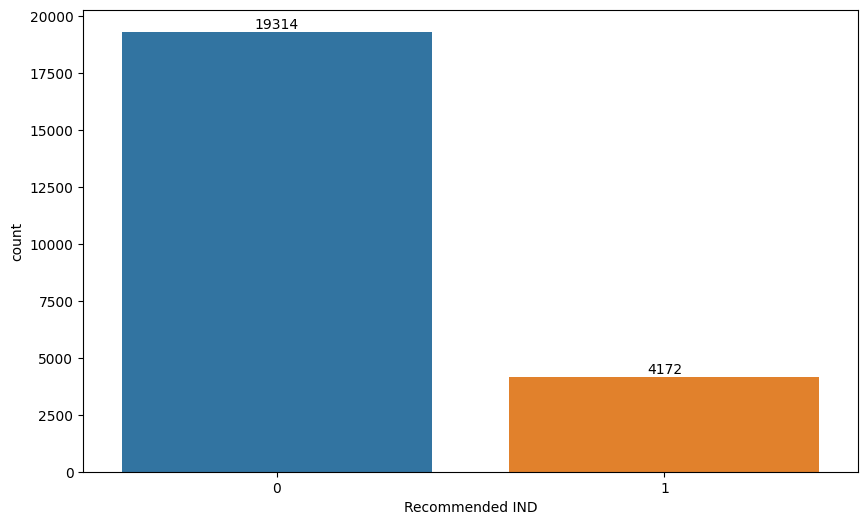

In [17]:
ax = sns.countplot(data =df, x = "Recommended IND")
ax.bar_label(ax.containers[0]);

In [18]:
df["Recommended IND"].value_counts(normalize=True)

0    0.822362
1    0.177638
Name: Recommended IND, dtype: float64

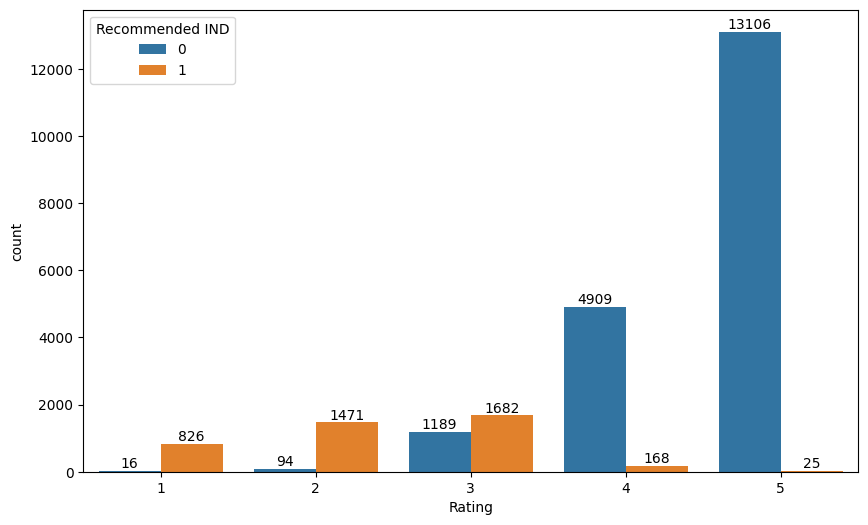

In [19]:
ax = sns.countplot(data = df, x ="Rating", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [20]:
df[df["Recommended IND"]==1]["Review Text"].sample(3)

9892     I bought the bronze color which was nice but t...
17101    I tried on this top and it looked fine until i...
16896    It's a cute topper. it fits nicely through the...
Name: Review Text, dtype: object

In [21]:
df[df["Recommended IND"]==1]["Review Text"][9956]

'I just received these jeans and the fit it good. but they smell like moth balls and i have washed them twice already. i hope it will go away, otherwise i wasted $100.'

In [22]:
df[df["Recommended IND"]==1]["Review Text"][10410]

"This sweater is ok. i love, love, love bell sleeves so i thought for sure this would be perfect. i thought it would be a great sweater to transition from winter to spring, but once it arrived, i knew i had to return. the sleeves are not only bell but very long and the sweater fits chunky on your midsection. i like my sweaters more flowy. if you like fitted-style sweaters that are a bit roomy you would like this once. also, it's a bit itchy for me-but i'm rather sensitive and if i'd loved this on"

In [23]:
df[df["Recommended IND"]==1]["Review Text"][7871]

"I bought this dress on super sale and it was such a great deal. sadly it's going back although i sized down i still feel like the dress is shapeless and tent like. no wonder why the store had so many still at the price i paid. the details on the dress are pretty and it's high quality. just wish the fit was better."

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [24]:
df = df[["Recommended IND","Review Text"]]

In [25]:
df.head()

,Recommended IND,Review Text
0,0,Absolutely wonderful - silky and sexy and comf...
1,0,Love this dress! it's sooo pretty. i happene...
2,1,I had such high hopes for this dress and reall...
3,0,"I love, love, love this jumpsuit. it's fun, fl..."
4,0,This shirt is very flattering to all due to th...


In [26]:
df.rename(columns={"Recommended IND":"Recommended_IND","Review Text":"Review_Text"},inplace=True)
df.head()

,Recommended_IND,Review_Text
0,0,Absolutely wonderful - silky and sexy and comf...
1,0,Love this dress! it's sooo pretty. i happene...
2,1,I had such high hopes for this dress and reall...
3,0,"I love, love, love this jumpsuit. it's fun, fl..."
4,0,This shirt is very flattering to all due to th...


---
---


### Missing Value Detection

In [27]:
df.isnull().sum()

Recommended_IND      0
Review_Text        845
dtype: int64

In [28]:
df.dropna(inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Recommended_IND  22641 non-null  int64 
 1   Review_Text      22641 non-null  object
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [30]:
import nltk

In [31]:
stop_words = stopwords.words('english')
for i in ["not", "no"]:
        stop_words.remove(i)

In [32]:
df["Review_Text"][1903]

'I love these jeans, well,i have not worn them out yet so not sure if they will stretch, but just in terms of fit and cut, i really like them. i normally wear ch or ag in 25 or 26. i got these in 25 and they fit perfectly. i love the stretch, great color, not too thin, very comfie. i was worried about too much flare, but not a problem. they are very long, but i am only 5"2 and i will be hemming them about 8 inches .'

In [33]:
df["Review_Text"][16793]

'I have been in love with white lace tops lately. i saw in the description that there was a "polyester lining" - i\'m really not into wearing a cami all the time as it takes away from the lace (my personal opinion). so i\'m a little disappointed there there is no lining. very pretty. styling is a bit more "swing".'

In [34]:
def cleaning(data):
   
    #1. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")
    
    #2. Tokenize
    text_tokens = word_tokenize(data.lower())
    
    #3. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [35]:
cleaning_text = df["Review_Text"].apply(cleaning)
cleaning_text.head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: Review_Text, dtype: object

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [36]:
df_notrecommended=df[df.Recommended_IND==1]
df_notrecommended

,Recommended_IND,Review_Text
2,1,I had such high hopes for this dress and reall...
5,1,"I love tracy reese dresses, but this one is no..."
10,1,Dress runs small esp where the zipper area run...
22,1,"First of all, this is not pullover styling. th..."
25,1,"Loved the material, but i didnt really look at..."
...,...,...
23449,1,I tried these on because the color is really p...
23450,1,I wanted to love this jacket. so soft and grea...
23460,1,I purchased this for a very good price and i t...
23478,1,I was surprised at the positive reviews for th...


In [37]:
df_recommended=df[df.Recommended_IND==0]
df_recommended

,Recommended_IND,Review_Text
0,0,Absolutely wonderful - silky and sexy and comf...
1,0,Love this dress! it's sooo pretty. i happene...
3,0,"I love, love, love this jumpsuit. it's fun, fl..."
4,0,This shirt is very flattering to all due to th...
6,0,I aded this in my basket at hte last mintue to...
...,...,...
23479,0,So i wasn't sure about ordering this skirt bec...
23481,0,I was very happy to snag this dress at such a ...
23482,0,"It reminds me of maternity clothes. soft, stre..."
23484,0,I bought this dress for a wedding i have this ...


### Collect Words (positive and negative separately)

In [38]:
df_notrecommended.Review_Text

2        I had such high hopes for this dress and reall...
5        I love tracy reese dresses, but this one is no...
10       Dress runs small esp where the zipper area run...
22       First of all, this is not pullover styling. th...
25       Loved the material, but i didnt really look at...
                               ...                        
23449    I tried these on because the color is really p...
23450    I wanted to love this jacket. so soft and grea...
23460    I purchased this for a very good price and i t...
23478    I was surprised at the positive reviews for th...
23483    This fit well, but the top was very see throug...
Name: Review_Text, Length: 4101, dtype: object

In [39]:
notrecommended_words = " ".join(df_notrecommended.Review_Text)

In [40]:
df_recommended.Review_Text

0        Absolutely wonderful - silky and sexy and comf...
1        Love this dress!  it's sooo pretty.  i happene...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23479    So i wasn't sure about ordering this skirt bec...
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review_Text, Length: 18540, dtype: object

In [41]:
recommended_words=" ".join(df_recommended.Review_Text)

###  Create Word Cloud (for most common words in recommended not recommended reviews seperately)

In [42]:
from wordcloud import WordCloud

In [43]:
wordcloud = WordCloud(max_words =200,background_color="black", colormap="rainbow")

In [44]:
wordcloud.generate(recommended_words)

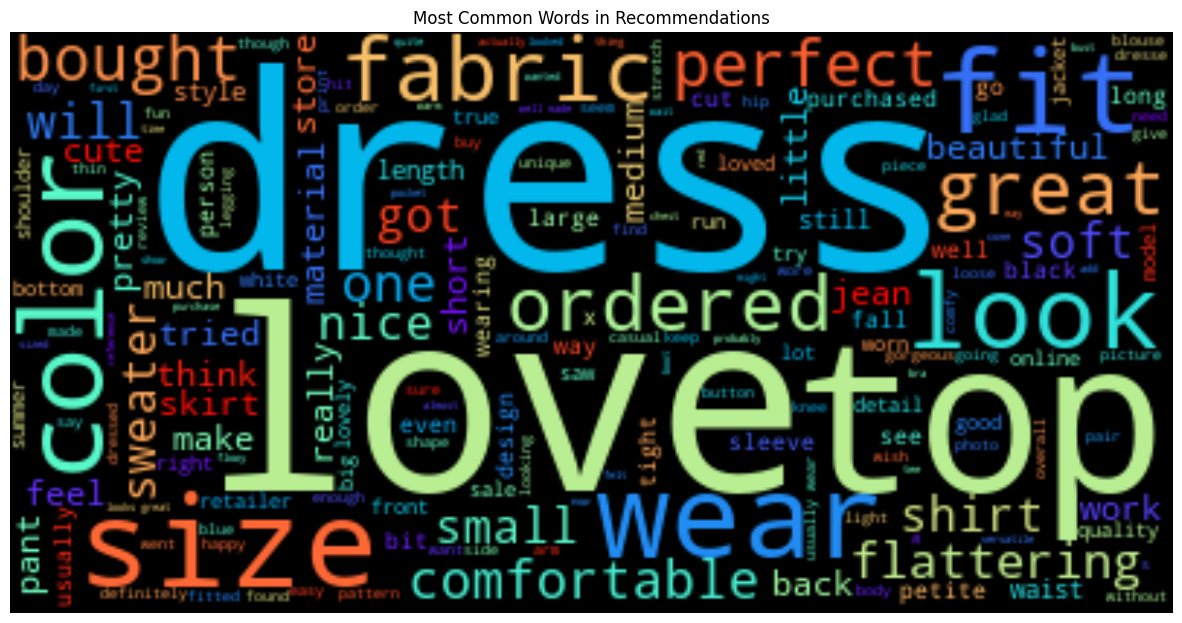

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Common Words in Recommendations")
plt.axis("off")
plt.show()

In [46]:
wordcloud.generate(notrecommended_words)

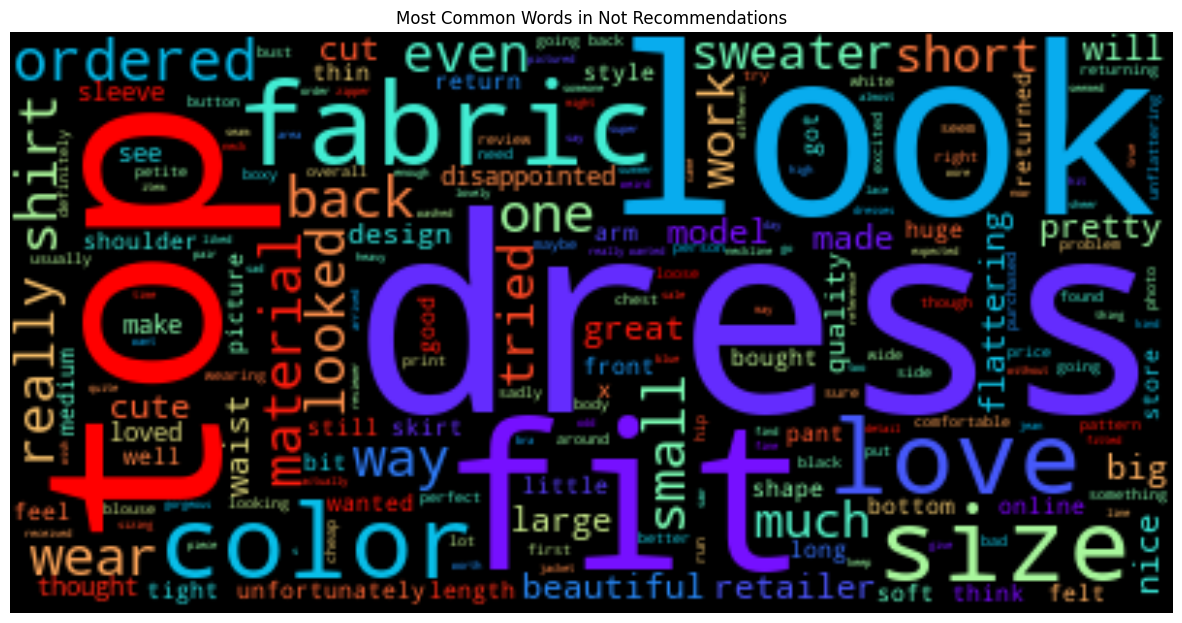

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Most Common Words in Not Recommendations")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X= df["Review_Text"].values
y=df["Recommended_IND"].values

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

In [52]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [53]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [54]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out()) 

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)            
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [57]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29292217],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Logistic Regression

### CountVectorizer

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [60]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [61]:
log = LogisticRegression(max_iter=1000,class_weight="balanced",random_state=101)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=101)

In [62]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3238  471]
 [ 157  663]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3709
           1       0.58      0.81      0.68       820

    accuracy                           0.86      4529
   macro avg       0.77      0.84      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     14831
           1       0.63      0.86      0.73      3281

    accuracy                           0.88     18112
   macro avg       0.80      0.87      0.83     18112
weighted avg       0.90      0.88      0.89     18112



Cross Validation

In [63]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [64]:
scoring=['precision','recall','f1','accuracy']

model = LogisticRegression(max_iter=1000, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.601867
train_precision    0.745628
test_recall        0.782995
train_recall       0.969996
test_f1            0.680533
train_f1           0.843138
test_accuracy      0.866774
train_accuracy     0.934617
dtype: float64

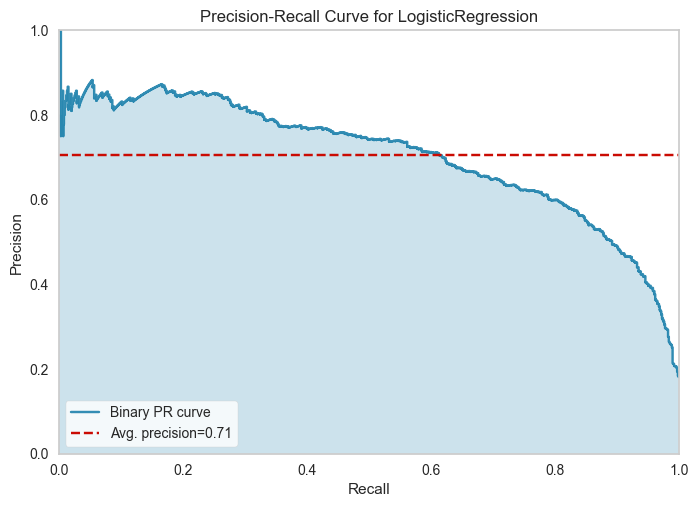

In [65]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C =0.01, max_iter=1000, class_weight= "balanced", random_state=101) 
    )
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [66]:
y_pred = log.predict(X_test_count)
log_AP_count = viz.score_
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [67]:
log = LogisticRegression(C=0.5, max_iter=1000, random_state=101, class_weight="balanced")
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [68]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3189  520]
 [ 107  713]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.58      0.87      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.92     14831
           1       0.62      0.92      0.74      3281

    accuracy                           0.88     18112
   macro avg       0.80      0.90      0.83     18112
weighted avg       0.91      0.88      0.89     18112



In [69]:
model = LogisticRegression(C=0.5, max_iter=1000, random_state=101, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.581205
train_precision    0.621069
test_recall        0.858281
train_recall       0.919977
test_f1            0.692899
train_f1           0.741533
test_accuracy      0.862136
train_accuracy     0.883822
dtype: float64

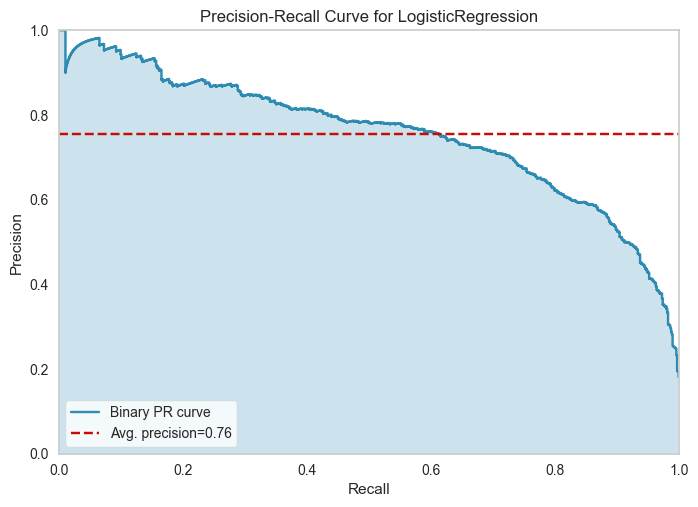

In [70]:
viz = PrecisionRecallCurve(
    LogisticRegression(C=0.5, max_iter=1000, random_state=101, class_weight="balanced")
    )
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [71]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [72]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=1.5)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=1.5)

In [73]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3396  313]
 [ 197  623]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3709
           1       0.67      0.76      0.71       820

    accuracy                           0.89      4529
   macro avg       0.81      0.84      0.82      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.70      0.80      0.75      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.86      0.84     18112
weighted avg       0.91      0.90      0.90     18112



In [74]:
model = MultinomialNB(alpha=1.5)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.658615
train_precision    0.704413
test_recall        0.745192
train_recall       0.801686
test_f1            0.699055
train_f1           0.749905
test_accuracy      0.883834
train_accuracy     0.903134
dtype: float64

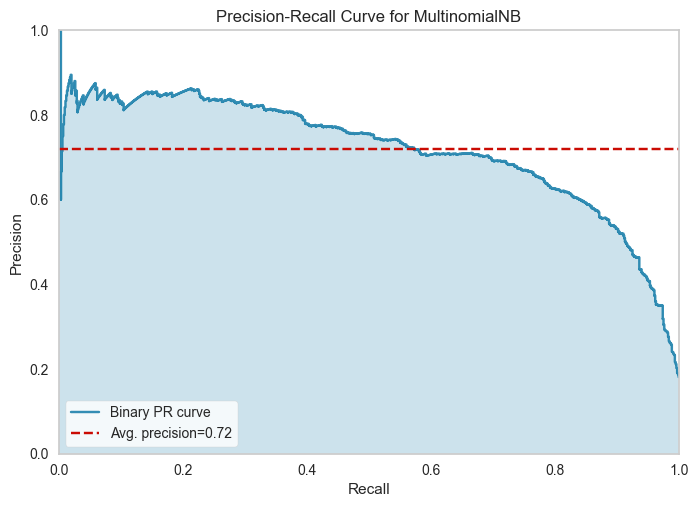

In [75]:
viz = PrecisionRecallCurve(
    MultinomialNB(alpha=1.5),
   
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [76]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [77]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [78]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3369  340]
 [ 207  613]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.91      0.92      3709
           1       0.64      0.75      0.69       820

    accuracy                           0.88      4529
   macro avg       0.79      0.83      0.81      4529
weighted avg       0.89      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.92      0.94     14831
           1       0.69      0.81      0.74      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.87      0.84     18112
weighted avg       0.91      0.90      0.90     18112



In [79]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.634826
train_precision    0.690194
test_recall        0.745494
train_recall       0.812049
test_f1            0.685557
train_f1           0.746174
test_accuracy      0.876159
train_accuracy     0.899919
dtype: float64

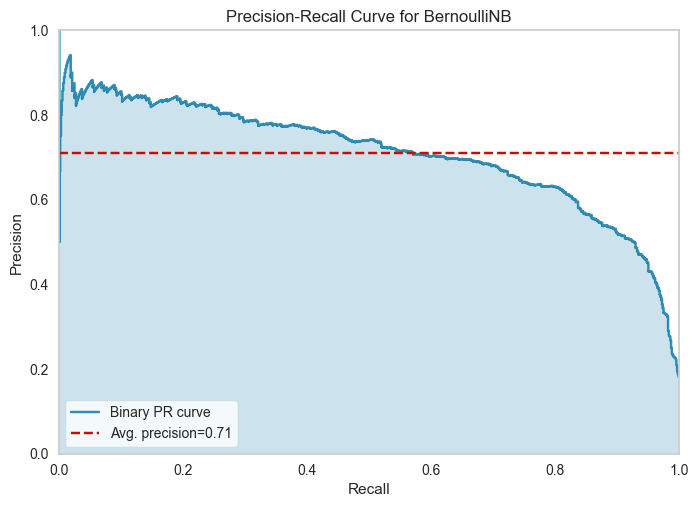

In [80]:
viz = PrecisionRecallCurve(
    BernoulliNB(alpha=0.7),
   
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [81]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [82]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [83]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3135  574]
 [ 116  704]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.90      3709
           1       0.55      0.86      0.67       820

    accuracy                           0.85      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     14831
           1       0.58      0.89      0.70      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [84]:
model = LinearSVC(C=0.001, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.553797
train_precision    0.574778
test_recall        0.853096
train_recall       0.887771
test_f1            0.671468
train_f1           0.697783
test_accuracy      0.848774
train_accuracy     0.860694
dtype: float64

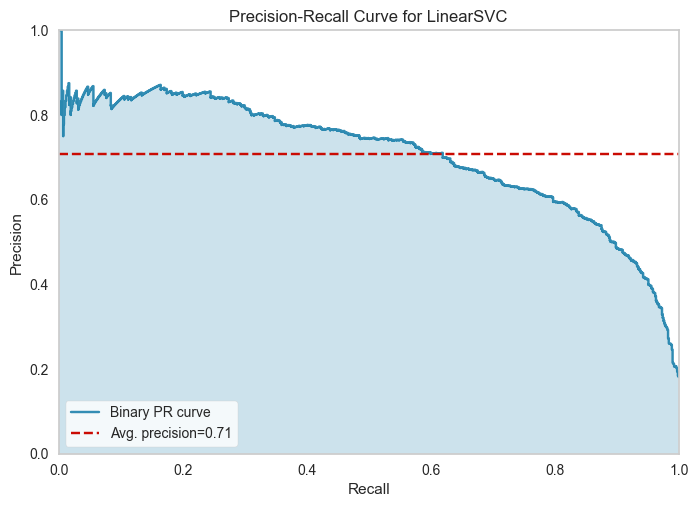

In [85]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.001, class_weight="balanced", random_state=101),
  
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [86]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [87]:
svc = LinearSVC(C=0.1, class_weight="balanced", random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1, class_weight='balanced', random_state=101)

In [88]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3189  520]
 [ 113  707]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      3709
           1       0.58      0.86      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     14831
           1       0.64      0.93      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.89      0.90     18112



In [89]:
model = LinearSVC(C=0.1, class_weight="balanced", random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.587430
train_precision    0.644243
test_recall        0.856147
train_recall       0.937959
test_f1            0.696617
train_f1           0.763837
test_accuracy      0.864841
train_accuracy     0.894932
dtype: float64

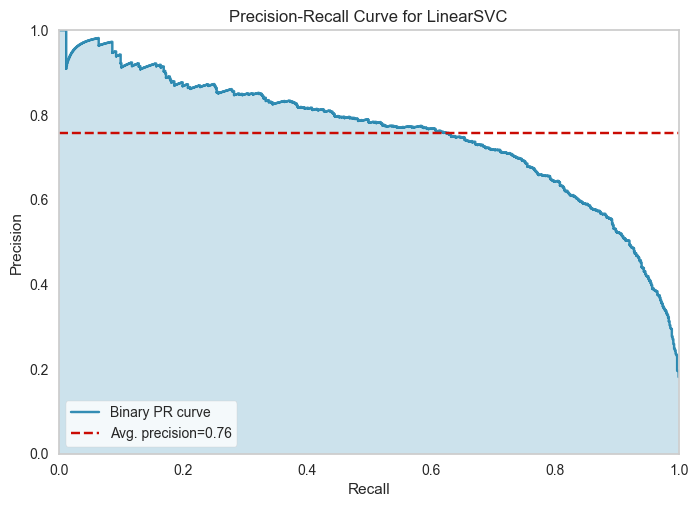

In [90]:
viz = PrecisionRecallCurve(
    LinearSVC(C=0.1, class_weight="balanced", random_state=101),

)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [91]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test,y_pred)

## Random Forest

### Countvectorizer

In [92]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 8, random_state = 101, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_jobs=-1,
                       random_state=101)

In [93]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3155  554]
 [ 177  643]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3709
           1       0.54      0.78      0.64       820

    accuracy                           0.84      4529
   macro avg       0.74      0.82      0.77      4529
weighted avg       0.87      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     14831
           1       0.58      0.85      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.86      0.80     18112
weighted avg       0.89      0.86      0.87     18112



In [94]:
model = RandomForestClassifier(n_estimators=100, max_depth= 8, class_weight="balanced", random_state = 101, n_jobs = -1)
scores = cross_validate(model, X_train_count.toarray(), y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.530358
train_precision    0.575477
test_recall        0.801283
train_recall       0.860442
test_f1            0.638106
train_f1           0.689629
test_accuracy      0.835357
train_accuracy     0.859682
dtype: float64

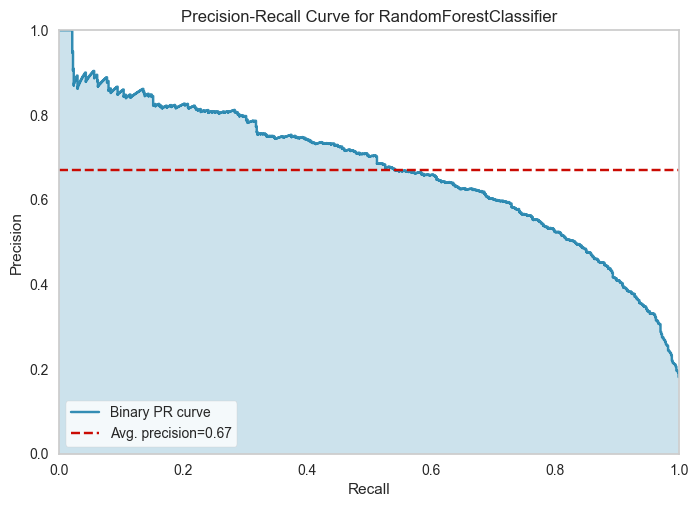

In [95]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(n_estimators=100, max_depth = 8, random_state = 101, n_jobs = -1, class_weight="balanced"),)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [96]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [97]:
rf = RandomForestClassifier(100, max_depth = 8, random_state = 101, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, n_jobs=-1,
                       random_state=101)

In [98]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3107  602]
 [ 164  656]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      3709
           1       0.52      0.80      0.63       820

    accuracy                           0.83      4529
   macro avg       0.74      0.82      0.76      4529
weighted avg       0.87      0.83      0.84      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14831
           1       0.57      0.87      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.86      0.80     18112
weighted avg       0.89      0.86      0.87     18112



In [99]:
model = RandomForestClassifier(n_estimators=100, max_depth = 8, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf.toarray(), y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.506431
train_precision    0.561594
test_recall        0.801272
train_recall       0.886620
test_f1            0.620461
train_f1           0.687577
test_accuracy      0.822383
train_accuracy     0.854013
dtype: float64

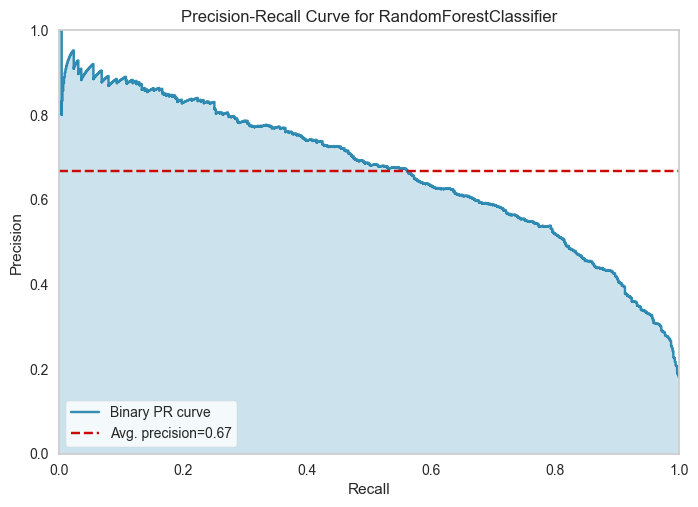

In [100]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
   
)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [101]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test,y_pred)

## Ada Boosting

### Countvectorizer

In [102]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
ada = AdaBoostClassifier(n_estimators=200,random_state = 101,learning_rate=0.5)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=101)

In [104]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3584  125]
 [ 441  379]]
Test_Set
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3709
           1       0.75      0.46      0.57       820

    accuracy                           0.88      4529
   macro avg       0.82      0.71      0.75      4529
weighted avg       0.87      0.88      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     14831
           1       0.79      0.46      0.58      3281

    accuracy                           0.88     18112
   macro avg       0.84      0.71      0.75     18112
weighted avg       0.87      0.88      0.87     18112



In [105]:
model = AdaBoostClassifier(n_estimators=200,random_state = 101,learning_rate=0.5)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.765845
train_precision    0.793670
test_recall        0.430671
train_recall       0.458397
test_f1            0.550760
train_f1           0.581138
test_accuracy      0.872847
train_accuracy     0.880300
dtype: float64

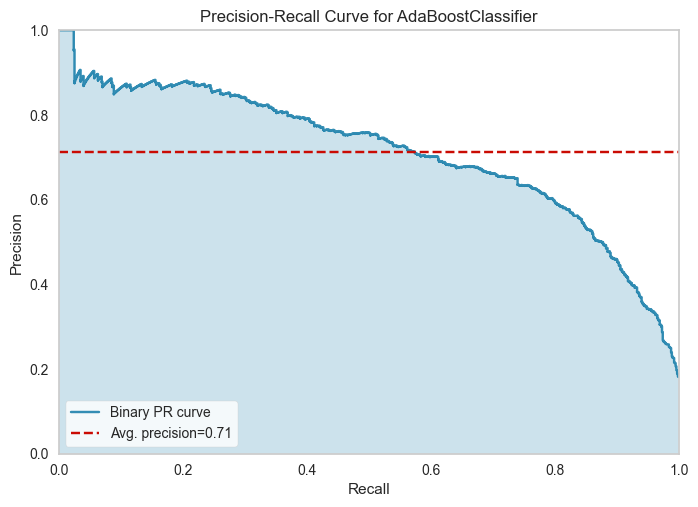

In [106]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 200, random_state = 101, learning_rate=0.5),
    
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [107]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [108]:
ada = AdaBoostClassifier(n_estimators= 200, random_state = 101, learning_rate=0.5)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200, random_state=101)

In [109]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3585  124]
 [ 449  371]]
Test_Set
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      3709
           1       0.75      0.45      0.56       820

    accuracy                           0.87      4529
   macro avg       0.82      0.71      0.75      4529
weighted avg       0.86      0.87      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.90      0.97      0.93     14831
           1       0.81      0.50      0.62      3281

    accuracy                           0.89     18112
   macro avg       0.85      0.74      0.78     18112
weighted avg       0.88      0.89      0.88     18112



In [110]:
model = AdaBoostClassifier(n_estimators= 200, random_state = 101, learning_rate=0.5)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision     0.760009
train_precision    0.813734
test_recall        0.444386
train_recall       0.497308
test_f1            0.560454
train_f1           0.617323
test_accuracy      0.873786
train_accuracy     0.888312
dtype: float64

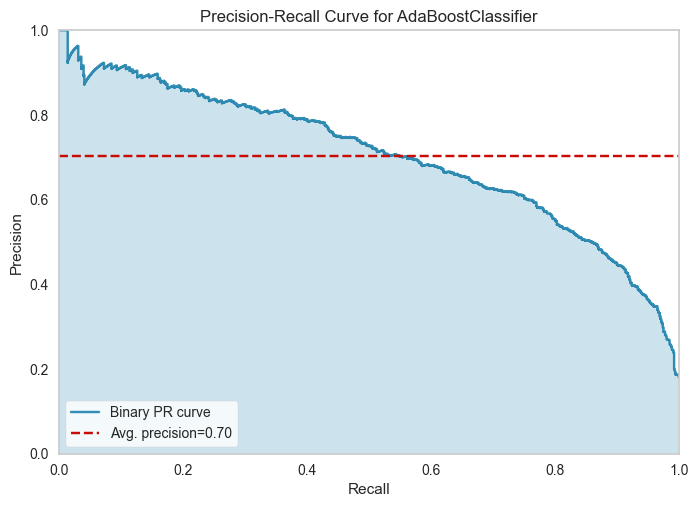

In [111]:
viz = PrecisionRecallCurve(
    AdaBoostClassifier(n_estimators= 200, random_state = 101, learning_rate=0.5),

)
viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [112]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test,y_pred)

## DL modeling

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [116]:
df_dl=df.copy()
df_dl

,Recommended_IND,Review_Text
0,0,Absolutely wonderful - silky and sexy and comf...
1,0,Love this dress! it's sooo pretty. i happene...
2,1,I had such high hopes for this dress and reall...
3,0,"I love, love, love this jumpsuit. it's fun, fl..."
4,0,This shirt is very flattering to all due to th...
...,...,...
23481,0,I was very happy to snag this dress at such a ...
23482,0,"It reminds me of maternity clothes. soft, stre..."
23483,1,"This fit well, but the top was very see throug..."
23484,0,I bought this dress for a wedding i have this ...


In [125]:
X = df_dl["Review_Text"]
y = df_dl["Recommended_IND"]

In [126]:
df_dl.shape

(22641, 2)

### Tokenization

In [127]:
tokenizer = Tokenizer()

tokenizer.fit_on_texts(X)

### Creating word index

In [130]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [131]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [132]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [133]:
X[41]

"This is a beautiful top. it's unique and not so ordinary. i bought my usual medium and i found that it fits tight across my chest. although i had a baby this year and i am nursing, so that could be why. if i bought again i would size up."

In [134]:
print(X_num_tokens[41])

[7, 6, 4, 73, 25, 33, 278, 3, 19, 16, 2339, 2, 72, 17, 236, 97, 3, 2, 219, 20, 5, 78, 148, 488, 17, 190, 426, 2, 65, 4, 726, 7, 440, 3, 2, 38, 2495, 16, 20, 118, 29, 474, 49, 2, 72, 498, 2, 41, 22, 43]


### Maximum number of tokens for all documents¶

In [135]:
len(X_num_tokens[41])

50

In [136]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [137]:
num_tokens.mean()

60.60699615741354

In [138]:
num_tokens.max()

116

In [139]:
num_tokens.argmax()

16263

In [140]:
X[16263]

"I love this sweater. as others have mentioned, it's not the softest acrylic in the world, but i can overlook that for the simple fact that it's adorable. i like the cropped fit- pairs perfectly with high waisted jeans/skirts. the embroidery has a sort of handmade feel to it without looking cheap. the slit up only one side makes it unique in my opinion. i did expect it to be a bit heavier, but it's a great layering piece and ideal for transitioning into colder weather. i may be biased because of"

In [141]:
max_tokens = 116

In [142]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [143]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [144]:
X_pad.shape

(22641, 116)

In [146]:
np.array(X_num_tokens[41])

array([   7,    6,    4,   73,   25,   33,  278,    3,   19,   16, 2339,
          2,   72,   17,  236,   97,    3,    2,  219,   20,    5,   78,
        148,  488,   17,  190,  426,    2,   65,    4,  726,    7,  440,
          3,    2,   38, 2495,   16,   20,  118,   29,  474,   49,    2,
         72,  498,    2,   41,   22,   43])

In [147]:
X_pad[41]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          7,    6,    4,   73,   25,   33,  278,    3,   19,   16, 2339,
          2,   72,   17,  236,   97,    3,    2,  219,   20,    5,   78,
        148,  488,   17,  190,  426,    2,   65,    4,  726,    7,  440,
          3,    2,   38, 2495,   16,   20,  118,   29,  474,   49,    2,
         72,  498,    2,   41,   22,   43])

In [150]:
X_pad[16263]

array([   2,   21,  771,  218,    2,   21,    1,   83,    3,  145,   13,
          7,  480,   74,    2,  196,    1,  447,  218,   20,  364,   62,
          2,  516,    8,   17,  494,  106,    8,  179,   56,   11,   36,
        107,    4,   79,    9,    4,   25,  425,    9,    4,  247,   60,
        418,   42,  117,   65,    4,   79,    8,  179,   16,    2,  104,
          5,    9,    1,  123,  791,    2,  118,  778,  115,    1,   25,
         11,    5,  157,   28,    2,   15, 1609,  504,  160,   13,    1,
         25,    2, 4114, 1777,    1,   22,    3,    5,   15,    4,   79,
         33,    4, 1376,    1,   25,    6,   51,   69,   49,   40,   27,
          1,  502,   77,  652,   37,  583,  147,   43,    4,   22,   37,
        262,   49,   40,   27,  107,    4])

In [151]:
np.array(X_num_tokens[16263])

array([   2,   21,  771,  218,    2,   21,    1,   83,    3,  145,   13,
          7,  480,   74,    2,  196,    1,  447,  218,   20,  364,   62,
          2,  516,    8,   17,  494,  106,    8,  179,   56,   11,   36,
        107,    4,   79,    9,    4,   25,  425,    9,    4,  247,   60,
        418,   42,  117,   65,    4,   79,    8,  179,   16,    2,  104,
          5,    9,    1,  123,  791,    2,  118,  778,  115,    1,   25,
         11,    5,  157,   28,    2,   15, 1609,  504,  160,   13,    1,
         25,    2, 4114, 1777,    1,   22,    3,    5,   15,    4,   79,
         33,    4, 1376,    1,   25,    6,   51,   69,   49,   40,   27,
          1,  502,   77,  652,   37,  583,  147,   43,    4,   22,   37,
        262,   49,   40,   27,  107,    4])

### Train Set Split

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)

### Modeling

In [154]:
embedding_size=50

In [157]:
model = Sequential()

model.add(Embedding(input_dim=len(tokenizer.word_index)+1,
                    output_dim=embedding_size,  
                    input_length=max_tokens)) 

model.add(Dropout(0.5))

model.add(GRU(units=48, return_sequences=True))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(GRU(units=24, return_sequences=True))
model.add(Dropout(0.5))

model.add(GRU(units=12))
# model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [158]:
optimizer = Adam(learning_rate=0.001)

In [159]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [160]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 116, 50)           742400    
                                                                 
 dropout (Dropout)           (None, 116, 50)           0         
                                                                 
 gru (GRU)                   (None, 116, 48)           14400     
                                                                 
 dropout_1 (Dropout)         (None, 116, 48)           0         
                                                                 
 gru_1 (GRU)                 (None, 116, 24)           5328      
                                                                 
 dropout_2 (Dropout)         (None, 116, 24)           0         
                                                                 
 gru_2 (GRU)                 (None, 12)               

In [161]:
from tensorflow.keras.callbacks import EarlyStopping

In [162]:
early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 1, restore_best_weights=True)

In [163]:
from sklearn.utils import class_weight

In [164]:
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([0.61061291, 2.76013411])

In [165]:
model.fit(X_train, y_train, epochs=20, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/20
142/142 [==============================] - 26s 153ms/step - loss: 0.5555 - recall: 0.6093 - val_loss: 0.4383 - val_recall: 0.9244
Epoch 2/20
142/142 [==============================] - 20s 143ms/step - loss: 0.3434 - recall: 0.8912 - val_loss: 0.4465 - val_recall: 0.9329
Epoch 3/20
142/142 [==============================] - 20s 143ms/step - loss: 0.2880 - recall: 0.9232 - val_loss: 0.3051 - val_recall: 0.7854
Epoch 3: early stopping


In [166]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.555549,0.609265,0.438319,0.924390
1,0.343358,0.891192,0.446531,0.932927
2,0.288012,0.923194,0.305093,0.785366


<AxesSubplot:>

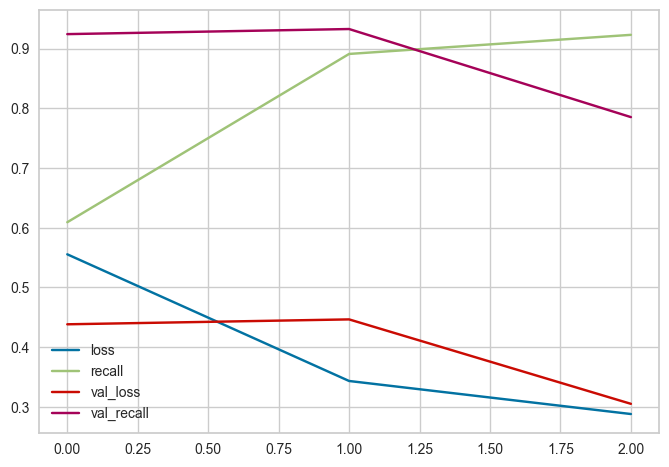

In [167]:
model_loss.plot()

In [168]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 2s 17ms/step - loss: 0.4465 - recall: 0.9329


[0.44653111696243286, 0.9329268336296082]

In [171]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

In [170]:
y_pred = model.predict(X_test) >= 0.5
y_train_pred = model.predict(X_train) >= 0.5

print("Test Result")
print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))
print("Train Result")
print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 9s 17ms/step
Test Result
[[2811  898]
 [  55  765]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.76      0.86      3709
           1       0.46      0.93      0.62       820

    accuracy                           0.79      4529
   macro avg       0.72      0.85      0.74      4529
weighted avg       0.89      0.79      0.81      4529

Train Result
[[11813  3018]
 [   79  3202]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.80      0.88     14831
           1       0.51      0.98      0.67      3281

    accuracy                           0.83     18112
   macro avg       0.75      0.89      0.78     18112
weighted avg       0.91      0.83      0.85     18112



In [173]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

142/142 [==============================] - 2s 16ms/step


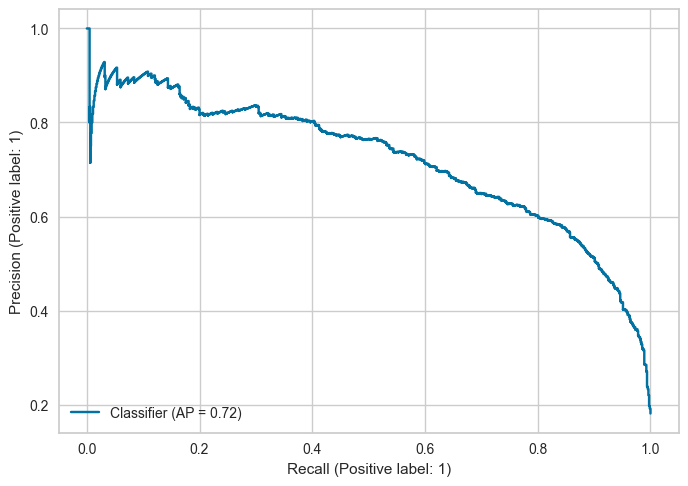

In [174]:
y_pred_proba = model.predict(X_test)
PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show()

In [175]:
from sklearn.metrics import average_precision_score

In [176]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [177]:
!pip install transformers

     ---------------------------------------- 5.3/5.3 MB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 6.8 MB/s eta 0:00:00
     ------------------------------------- 163.5/163.5 kB 10.2 MB/s eta 0:00:00


### Tokenization

In [179]:
from transformers import AutoTokenizer

In [180]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))


Max sentence length:  162


In [182]:
np.array(max_token).mean()

76.75659202332052

In [183]:
sum(np.array(max_token) <= 162) / len(max_token)

1.0

### Train test split

In [195]:
X = df_dl['Review_Text'].values
y = df_dl['Recommended_IND'].values

In [196]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [197]:
def transformation(X):
  # set array dimensions
  seq_len = 162
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [198]:
Xids_train, Xmask_train = transformation(X_train2)

Xids_test, Xmask_test = transformation(X_test2)

In [199]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (18112, 162)
Xmask_train.shape : (18112, 162)
Xids_test.shape   : (4529, 162)
Xmask_test.shape  : (4529, 162)


In [200]:
labels_train = y_train2.reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [201]:
labels_test = y_test2.reshape(-1,1)
labels_test

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

### Transformation text to tensor

In [202]:
import tensorflow as tf

In [206]:
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [203]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [204]:
def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [207]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [208]:
dataset_train

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [209]:
dataset_test

<MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [210]:
batch_size = 32

# batch_size 
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

length = len(X_train)
train_ds2 = dataset_train.shuffle(buffer_size = length, reshuffle_each_iteration=True).batch(batch_size)

### Creating Model

In [ ]:
def create_model():
    from transformers import TFAutoModel
    from tensorflow.keras.layers import Input, Dropout, Dense
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = Dense(80, activation='relu')(embeddings) 
    x = Dropout(0.1, name="dropout")(x) #0.1
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)

In [ ]:
with strategy.scope():

  from tensorflow.keras.optimizers import Adam
  from tensorflow.keras.losses import BinaryCrossentropy
  from tensorflow.keras.metrics import Recall
  
  optimizer = Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = BinaryCrossentropy()
  recall = Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

In [ ]:
model3.summary()

In [ ]:
history = model3.fit(
    train_ds2, validation_data= val_ds,
    epochs=1) 

### Model evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

print(classification_report(y_test2, y_pred))

In [ ]:
y_train_pred = model3.predict(train_ds) >= 0.5

print(classification_report(y_train2, y_train_pred)) 

In [ ]:
y_pred_proba = model3.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [ ]:
average_precision_score(y_test2, y_pred_proba)

In [ ]:
BERT_without_weighted_AP = average_precision_score(y_test2, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test2, y_pred)
BERT_without_weighted_rec = recall_score(y_test2, y_pred)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL", "BERT_Weighted", "BERT_Without_Weighted"],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1, BERT_with_weighted_f1, BERT_without_weighted_f1],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec, BERT_with_weighted_rec, BERT_without_weighted_rec],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP, BERT_with_weighted_AP, BERT_without_weighted_AP]})


plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___